In [14]:
##### (5) 주성분 분석 (p491)

# 이제부터는 레이블에 대한 참조 없이도 데이터의 흥미로운 측면을 강조할 수 있는 비지도 학습 추정기임
# 주성분 분석(PCA : Principal Component Analysis)는 기본적으로 차원 축소 알고리즘이지만,
# 노이즈 필터링, 특징 추출 및 특징 공학 등에서도 유용하게 사용되는 도구다.

# 표준 import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

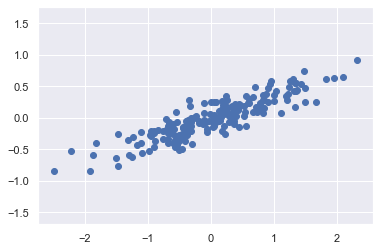

In [16]:
# 예제 데이터 : 딱 봐도 선형관계가 있어보임
# 비지도학습은 x값으로부터 y값을 예측하는게 아니라, x와 y값 사이의 관계에 대해 학습하는 것임.

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [19]:
# 적합은 데이터로부터 얻은 수량을 학습하는데, 가장 중요한것은 component와 explained variance이다.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
print(pca.fit(X))
print(pca.components_)
print(pca.explained_variance_)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


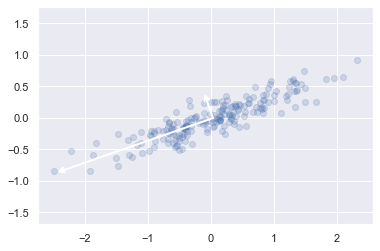

In [20]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
p#lt.axis('equal');

In [21]:
### PCA 응용 : 차원 축소
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


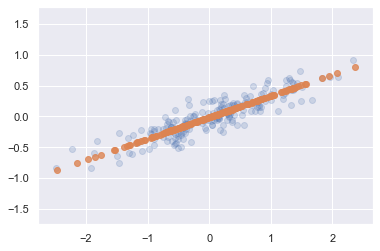

In [22]:
# 차원 축소의 효과를 이해하려면 차원 축소된 데이터를 역변환해서 원본 데이터와 함께 플로팅하면 된다.
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [24]:
### PCA를 사용한 시각화 : MNIST데이터
from sklearn.datasets import load_digits
digits = load_digits()
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


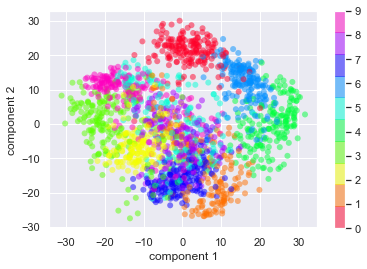

In [30]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

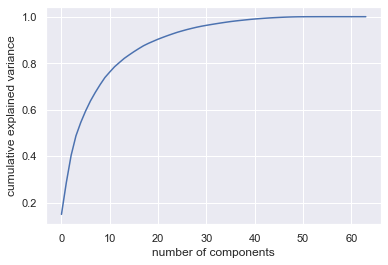

In [31]:
### 성분(component) (P497 줄글 설명 다시 쭉 읽어보는게 좋을듯)
# 성분의 개수 선택 : 누적 explained variance ratio를 보면 됨
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
# PCA 정리

# PCA는 다재다능하고 해석이 가능해서 다양한 상황과 분야에서 효과적이라는 사실도 확인했다.
# 저자는 고차원 데이터세트가 주어지면,
# 1. 점들 간의 관계를 시각화 하고 (p496)
# 2. 데이터의 주분산을 이해하고 (p501)
# 3. 직관적 차원을 이해하기 위해 PCA를 적용한다 (P502) 

# PCA의 주요 약점은 데이터의 이상치에 의해 심하게 영향을 받는 경향이 있다는 것이다
# 그래서 다양한 PCA변형이 개발됐다.
# 다양체 학습도 PCA의 개념을 바탕으로 구축한 다른 비지도 학습 방법임

In [ ]:
#########################################################################################################################

In [2]:
##### (6) 다양체 학습 (p504)

# 다양체 학습(manifold learning) : 고차원 공간에 내장된 저차원 다양체로 데이터세트를 설명하고자 하는 비지도 추정방식
# 다차원 척도법(MDS, Multidimensional Scailing)
# 국부 선형 임베딩(LLE, Locally Linear Embedding)
# 등거리 사상(Isomap, isometric mapping)

# 표준 import
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [3]:
# 단어 HELLO라는 모양의 데이터를 생성하는 함수
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

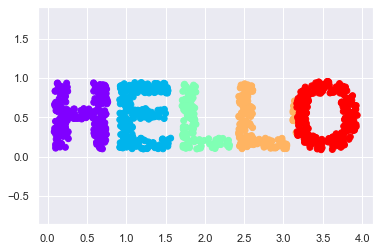

In [4]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

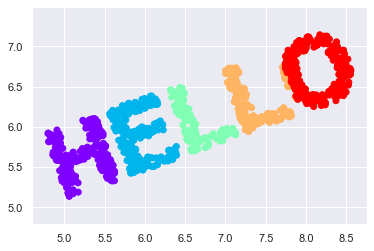

In [5]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');
# 회전을 시켜도 데이터의 본질은 변하지 않는다.
# x와 y값이 데이터의 관계에 있어서 근본적인 것은 아니라는 것.
# 이 경우에 근본적인 것은 데이터세트의 점과 점 사이의 거리다.
# 이를 표현하는 보편적인 방식은 거리행렬을 사용하는 것이다.

In [6]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

In [8]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

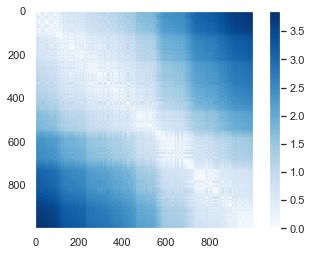

In [7]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();
# 이 거리행렬로 회전과 이동에 변하지 않는 데이터를 표현할 수 있지만, 행렬의 모습이 전혀 직관적이지 않다.
# 게다가 x,y좌표에서 이 거리 행렬을 계산하는 것은 간단하지만, 거리로부터 x와 y좌표를 다시 변환하는 것은 상당히 어렵다.
# 이것이 바로 다차원 척도법 알고리즘이 하려는 일이다.
# 이 알고리즘은 점 사이의 거리 행렬이 주어지면 데이터의 D-차원 좌표 표현을 복구한다.

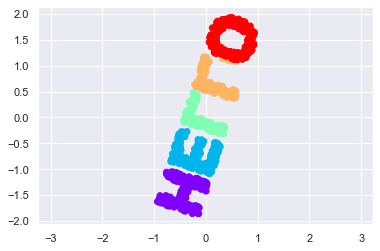

In [9]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');
# MDS 알고리즘은 데이터 점 사이의 관계를 설명하는 N*N거리 행렬만을 사용해 사용 가능한 2차원 좌표 표현 중 하나를 복구한다.

In [10]:
# 거리 행렬이 모든 차원의 데이터로부터 계산될 수 있다는 사실을 고려하면 MDS의 유용성이 더욱 분명해진다

def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)
X3.shape

(1000, 3)

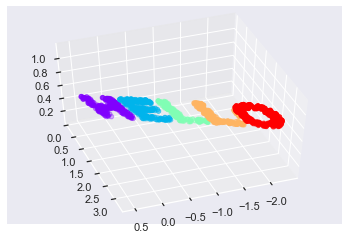

In [11]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

In [ ]:
# 즉, 고차원의 임베딩된 데이터가 주어졌을 때 다양체 학습이 데이터 내의 특정 관계를 보존하는 데이터의 저차원 표현을 찾는 것이
# 다양체 학습 추정기의 모표이다.

# MDS가 실패하는 경우는 임베딩이 비선형 일 때 이다.
# 즉, 임베딩이 이 간단한 연산을 넘어서는 경우이다.

In [12]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

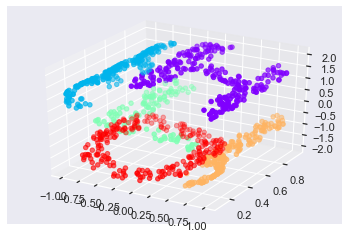

In [13]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize);

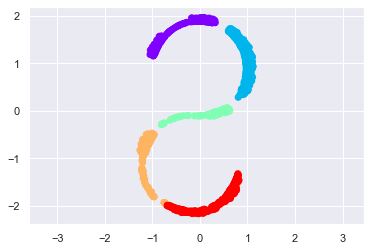

In [14]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');
# 비선형 데이터에 적용된 mds알고리즘. 이 알고리즘은 기본 구조를 복구할 수 없다.

In [ ]:
# 이 문제의 해결법 -> 국소 선형 임베딩(LLE)
# 모든 거기를 보존하는 대신 이웃하고 있는 점들 사이의 거리만 보존한다.

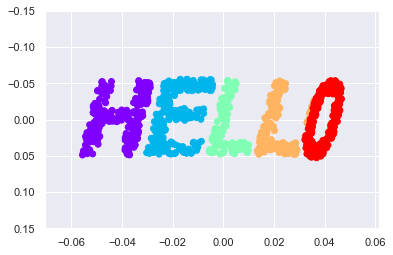

In [15]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

In [ ]:
# 실제로 다양체 학습 기법은 까다로워서 고차원 데이터를 단순히 정성적으로 시각화하는 작업 외에는 거의 사용되지 않는다.

# 또, PCA와 비교해서 여러가지 취약점들이 많이 존재한다.
# 다양체 학습기법이 PCA보다 우위에 있는 유일한 장점은 데이터의 비선형 관계를 보존할 수 있다는 것이다.
# 이 때문에 저자는 PCA로 데이터를 확인한 다음에만 다양치 기법으로 데이터를 탐색한다고 한다.

In [ ]:
#########################################################################################################################

In [17]:
##### (7) K-평균 군집화 (p522)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

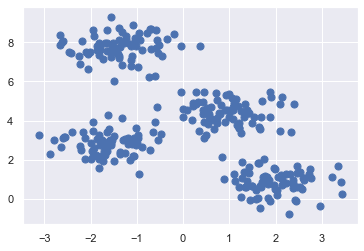

In [18]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

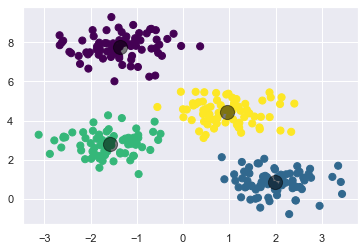

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

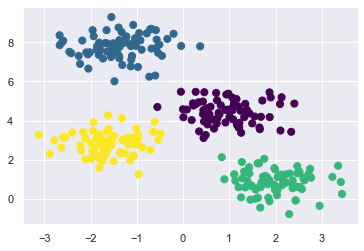

In [21]:
# 군집 할당의 가능한 조합 수는 데이터 점 개수에 지수적이다
# 그래서 전체 검색은 비용이 아주 많이 든다.
# 대신에 k-평균에 접근하는 일반적인 방식은 EM 알고리즘을 사용한다.

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [ ]:
# 주의사항으로 em절차는 각 단계의 결과가 개선되는 것은 보장하지만, 전체적으로 최선인 해결책을 얻게 되리란 보장은 없다.
# 가령 간단한 절차에 다른 난수 초기값을 사용하면 그 특정 초기 추측값으로 인해 만족스럽지 않은 결과를 얻을 수 있다.

# 또, 군집 개수를 사전에 정해줘야 한다는 단점이 있다.

# 그리고 k-평균은 선형 군집 경계로 한정된다
# scikit-learn에서는 이 커널화된 k평균의 한 버전이 SpectalClustering 추정기 내에 구현돼 있다.

# k-평균은 표본 수가 많을 때 느려질 수 있다.


In [22]:
#########################################################################################################################

In [23]:
##### (8) 가우스 혼합 모델 (p537)

# k means clustering 모델은 간단하고 이해하기가 비교적 쉽지만, 오히려 그 단순함이 그 모델을 응용하는데 있어 현실적인 문제를 일으킨다.
# 가우스 혼합 모델(GMM)은 k means의 개념을 확장한 것이다.

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [27]:
# k means는 단순하고 잘 구분된 데이터의 경우 적합한 군집화 결과를 구해준다.
# 안타깝게도 k means는 군집 할당의 확률이나 불확실성에 대한 고유 척도가 없다.
# 그리고, k means의 군집 모델이 원형이어야 한다는 점이다.
# (1) clustering 모양에서 유연성이 떨어지고, (2) 확률적 군집 할당이 빈약하다는 점
# => k means가 많은 데이터세트(특히 저차원 데이터 세트)에서 그것이 기대하는 만큼 잘 동작하지 않을 수 있음을 뜻한다.

# GMM은 어떤 입력 데이터세트라도 최적으로 모델링하는 다차원 가우스 확률 분포의 혼합을 구하려고 한다.

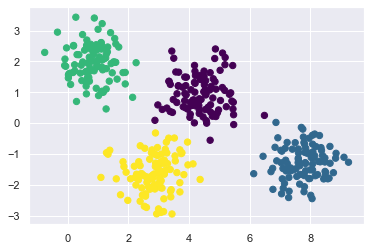

In [31]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [32]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.537 0.463 0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]]


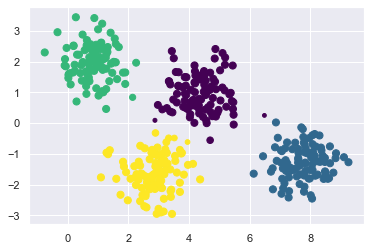

In [33]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [ ]:
#########################################################################################################################

In [ ]:
##### (9) 커널 밀도 추정(KDE : Kernel Density Estimation)

# 앞에서 한 GMM은 clustering과 density estimation의 하이브리드 형태라고 할 수 있따.
# 밀도 추정 : D차원 데이터세트를 가져다가 데이터를 추출할 수 있는 D차원의 확률 분포를 추정하는 알고리즘이다.

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

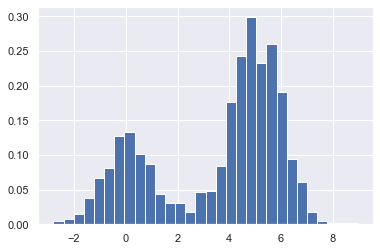

In [40]:
# KDE 등장배경 : 히스토그램

def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)
hist = plt.hist(x, bins=30, density=True)

In [43]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

In [44]:
x = make_data(20)
bins = np.linspace(-5, 10, 10)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


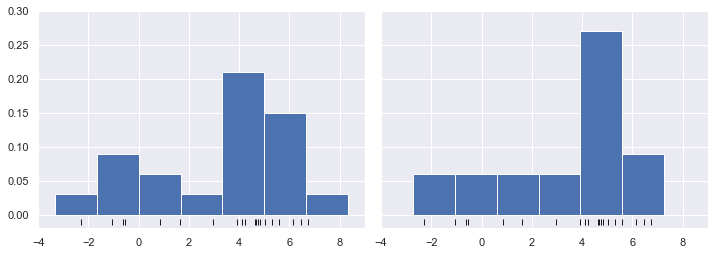

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       sharex=True, sharey=True,
                       subplot_kw={'xlim':(-4, 9),
                                   'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset, normed=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k',
               markeredgewidth=1)

(-0.2, 8)

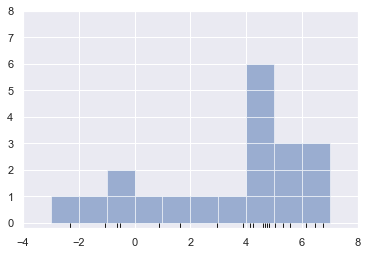

In [46]:
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k',
        markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1,
                                   alpha=0.5))
ax.set_xlim(-4, 8)
ax.set_ylim(-0.2, 8)

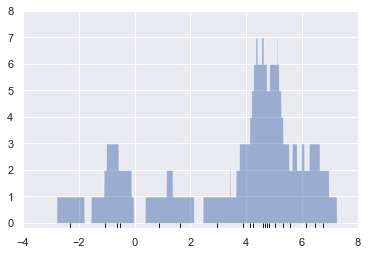

In [47]:
# 블록을 구간에 정렬해 쌓는 대신 그들이 표현하는 점에 맞춰 블록을 쌓는다면?
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 8]);

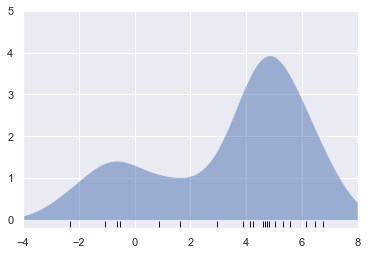

In [48]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 5]);